In [33]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/Classification\titanic\model_autoencoder')

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

# open yaml
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_autoencoder\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

params = {        
        'X_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_train']),
        'y_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_train']),
        'X_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_val']),
        'y_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_val'])
 
        }

In [23]:
X_train = pd.read_parquet(params['X_train_feat_sel'])
X_val = pd.read_parquet(params['X_val_feat_sel'])

In [12]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model

In [53]:
# Construir um Autoencoder
def build_autoencoder(input_dim, encoding_dim=32):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(32, activation='relu')(input_layer)
    encoded = Dense(16, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

In [59]:
input_dim = X_train.shape[1]  # para MNIST
autoencoder, encoder = build_autoencoder(input_dim, encoding_dim=6)

In [60]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=150,
    batch_size=256,
    shuffle=True,
    validation_data=(X_val, X_val))

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 1.2447 - val_loss: 1.2179
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.2393 - val_loss: 1.2120
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.2332 - val_loss: 1.2053
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2264 - val_loss: 1.1978
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2188 - val_loss: 1.1894
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.2104 - val_loss: 1.1802
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.2012 - val_loss: 1.1700
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.1909 - val_loss: 1.1587
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1796 - val_loss: 1.1465
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.1676 - val_loss: 1.1333
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.1546 - val_loss: 1.1192
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.1408 - val_l

Treinamento concluído!


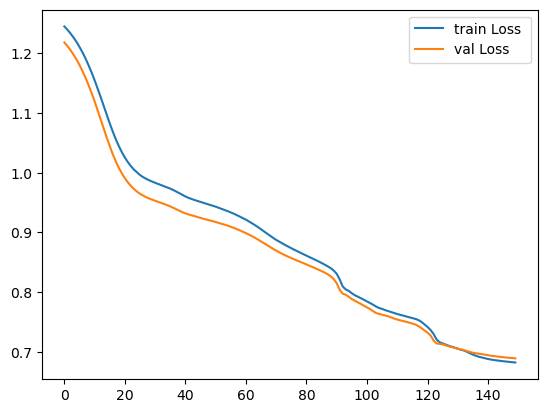

In [61]:
print("Treinamento concluído!")    
plt.plot(history.history['loss'], label='train Loss ')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()

In [62]:
encoded_features = encoder.predict(X_train)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [63]:
pd.DataFrame(encoded_features)

,0,1,2,3,4,5
0,2.873750,8.133416,0.000000,11.955964,0.000000,5.848726
1,4.415796,10.138210,6.129838,2.022391,4.828990,11.620955
2,3.247244,11.047447,0.000000,7.702712,0.000000,4.639963
3,3.019624,8.167631,0.000000,11.290270,0.504106,7.543417
4,2.660037,7.322256,0.000000,11.588051,0.000000,5.788343
...,...,...,...,...,...,...
663,14.869526,21.234043,6.964122,3.392458,8.593148,9.598994
664,6.629657,7.460722,0.000000,10.550441,1.749930,4.703889
665,7.334876,10.898243,0.000000,7.115665,0.000000,3.383069
666,13.787536,24.837412,7.045210,0.134456,3.668819,6.392055
